[{'duration': 1.7401683330535889,
  'name': 'Dummy',
  'params': {'constant': None, 'random_state': None, 'strategy': 'uniform'},
  'scores': {'accuracy': 0.49901138517993471,
             'confusion_matrix': array([[147221, 147636],
       [147804, 147053]]),
             'confusion_matrix_normalized': (array([[ 0.49929627,  0.50070373],
       [ 0.5012735 ,  0.4987265 ]]),),
             'f0.5_score': 0.49895393159533752,
             'precision': 0.49901082157800258,
             'recall': 0.49872650132097934}},
 {'duration': 194.70426630973816,
  'name': 'LogisticRegression',
  'params': {'C': 0.001,
             'class_weight': None,
             'dual': False,
             'fit_intercept': True,
             'intercept_scaling': 1,
             'max_iter': 100,
             'multi_class': 'ovr',
             'n_jobs': 1,
             'penalty': 'l2',
             'random_state': None,
             'solver': 'liblinear',
             'tol': 0.0001,
             'verbose': 0,
     

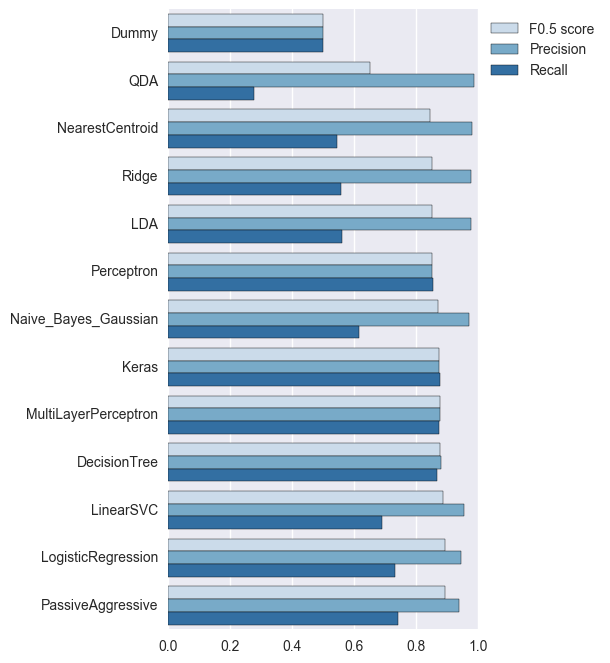

In [29]:
import pickle
import pprint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline  

# Method must be available to unpickle KerasClassifier
def keras_baseline_model():
    pass

results = []
with open("cv_results-fbeta05.p", "rb") as results_file:
    results = pickle.load(results_file)

pp = pprint.PrettyPrinter()

pp.pprint(results)
#print(len(results))

names = list(map(lambda x: x["name"], results))
accuracy = list(map(lambda x: x["scores"]["accuracy"], results))
f_score = list(map(lambda x: x["scores"]["f0.5_score"], results))
precision = list(map(lambda x: x["scores"]["precision"], results))
recall = list(map(lambda x: x["scores"]["recall"], results))

df = pd.DataFrame({
 'name':names,
 #'accuracy':accuracy,
 'F0.5 score':f_score,
 'Precision':precision,
 'Recall':recall,
}, index=names)
                                          
#ax = data.plot(kind='barh', yticks=np.arange(0,1,0.1), width=0.7, figsize=(12, 10), colormap="Oranges")

#plt.show()
#from matplotlib import rcParams
#rcParams.update({'figure.autolayout': True})
df = df.sort_values(by=["F0.5 score", "Precision", "Recall"])
df =pd.melt(df, id_vars="name", var_name='score')
df
plt.figure(figsize=(4,8))
g = sns.barplot(y="name", x="value", hue="score",data=df, orient="h", palette="Blues")
g.set_ylabel('')
g.set_xlabel('')
#df
#titanic = sns.load_dataset("titanic")
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
#plt.tight_layout()
plt.savefig('classifier-comparison.pdf', format='pdf', dpi=1000, bbox_extra_artists=(lgd,), bbox_inches='tight')
#from matplotlib2tikz import save as tikz_save
#tikz_save('algorithm-comparison.tex')
#df
# Setting the positions and width for the bars


#for res in results:
#    pp.pprint(res)

#3610ae
#fd0000
#00cb00
#fdd200

#print(names)